In [0]:
%matplotlib inline
from fastai.basics import *

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression problem

The goal of linear regression is to fit a line to a set of points.

In [0]:
n=100

In [13]:
x = torch.ones(n,2) 
x[:,0].uniform_(-1.,1)
x[:5]

tensor([[-0.4373,  1.0000],
        [-0.6013,  1.0000],
        [-0.5428,  1.0000],
        [ 0.5673,  1.0000],
        [ 0.6119,  1.0000]])

In [15]:
a = tensor(3.,2); a
help(tensor)

Help on function tensor in module fastai.torch_core:

tensor(x:Any, *rest) -> torch.Tensor
    Like `torch.as_tensor`, but handle lists too, and can pass multiple vector elements directly.



In [11]:
x = torch.arange(10)
x = x.reshape((2,5))
a = tensor(3,2)
a@x

tensor([10, 15, 20, 25, 30])

In [17]:
y = x@a + torch.rand(n)
y

tensor([ 1.3707,  0.7082,  0.6564,  3.9822,  4.5353,  1.6509,  3.9773,  1.4144,
         2.0675,  4.9702,  4.8035,  3.2311,  4.4594,  1.3347,  5.6555, -0.4679,
         4.9556,  0.9063,  3.2019,  2.8070,  0.4235,  1.8450,  0.1404,  4.6285,
         3.5279,  0.3717,  2.2624,  0.2577,  0.4563,  0.5705,  3.2483,  0.2806,
         2.7461,  3.4697, -0.0741,  5.2813,  4.5706, -0.1748,  1.0824,  3.6904,
         2.4613, -0.2439,  4.0050,  0.9207,  4.6363,  1.6385, -0.1318, -0.0837,
         1.4048,  5.4546,  4.4779,  2.7163,  3.5354,  1.2272,  1.8764,  2.8570,
         5.3559,  0.0380,  4.1899,  5.2431,  3.2766,  1.0116,  1.6935,  1.2817,
         1.6028,  1.8128,  2.9292,  0.2357,  1.6826,  0.5242,  5.7596,  2.4964,
         1.8854,  0.3105,  0.2055,  0.1923, -0.4201,  0.3323,  1.7564,  4.9768,
         4.6129,  2.2495, -0.0511,  4.5970,  3.9002, -0.2939,  0.5839, -0.1070,
         2.0679,  3.9548,  0.0875,  0.1460,  2.9306,  0.7832,  0.0175,  2.2245,
         2.0481, -0.0175,  5.3360,  1.15

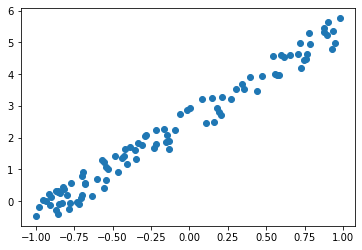

In [18]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [0]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (-1.0,1.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [0]:
a = tensor(-1.,1)

In [21]:
y_hat = x@a
mse(y_hat, y)

tensor(6.9473)

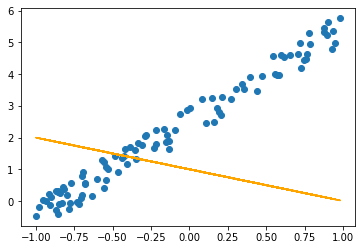

In [25]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],y_hat,color = 'orange');

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

In [23]:
a = nn.Parameter(a); a

Parameter containing:
tensor([-1.,  1.], requires_grad=True)

In [0]:
def update():
    y_hat = x@a
    loss = mse(y, y_hat)
    if t % 10 == 0: print(loss)
    loss.backward()
    with torch.no_grad():
        a.sub_(lr * a.grad)
        a.grad.zero_()

In [28]:
lr = 1e-1
for t in range(1000): update()

tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)
tensor(0.0849, grad_fn=<MeanBackward0>)


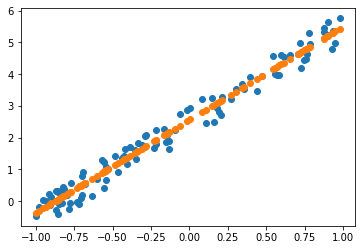

In [31]:
plt.scatter(x[:,0],y)
y_hat = x@a
plt.scatter(x[:,0],y_hat.detach().numpy());

## Animate it!

In [0]:
from matplotlib import animation, rc
rc('animation', html='jshtml')

In [36]:
a = nn.Parameter(tensor(-1.,1))

fig = plt.figure()
plt.scatter(x[:,0], y, c='orange')
y_hat = x@a
line, = plt.plot(x[:,0], y_hat.detach().numpy())
plt.close()

def animate(i):
    update()
    y_hat = x@a
    line.set_ydata(y_hat.detach().numpy())
    return line,

animation.FuncAnimation(fig, animate, np.arange(0, 100), interval=20)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocab

- Learning rate
- Epoch
- Minibatch
- SGD
- Model / Architecture
- Parameters
- Loss function

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.